<a href="https://colab.research.google.com/github/mentor-pranaya/Handwritten_Digit_Recognition_Infosys_Internship_Oct2024/blob/VELISHALA-THARUN-RAJ/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
mnist_dataset = datasets.MNIST(root='./data', download=True, transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 133162441.77it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 45318254.33it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 58731191.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2472810.07it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
mnist_loader = DataLoader(mnist_dataset, batch_size=25, shuffle=True)


In [5]:
def visualize_data(images, labels, title='Original Images'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axes[i // 5, i % 5]
        ax.imshow(images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(f'{title}: {labels[i].item()}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
images, labels = next(iter(mnist_loader))

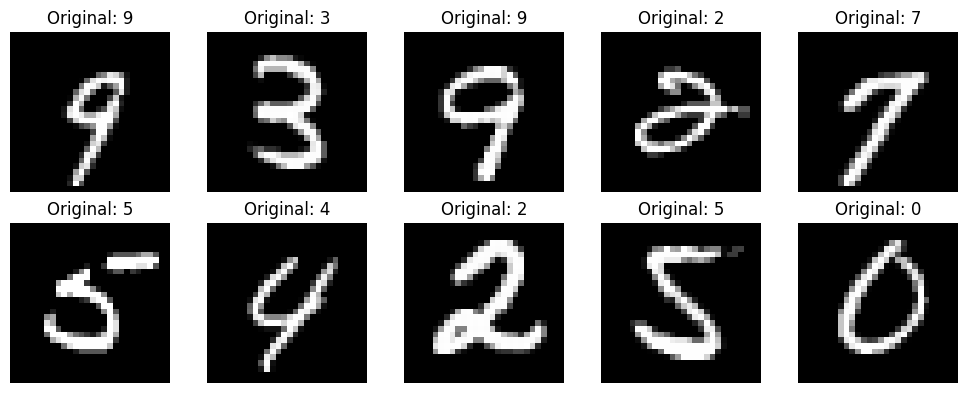

In [7]:
visualize_data(images, labels, title='Original')

In [8]:
transform_augment = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [9]:
mnist_augment_dataset = datasets.MNIST(root='./data', download=True, transform=transform_augment)


In [10]:
mnist_augment_loader = DataLoader(mnist_augment_dataset, batch_size=25, shuffle=True)


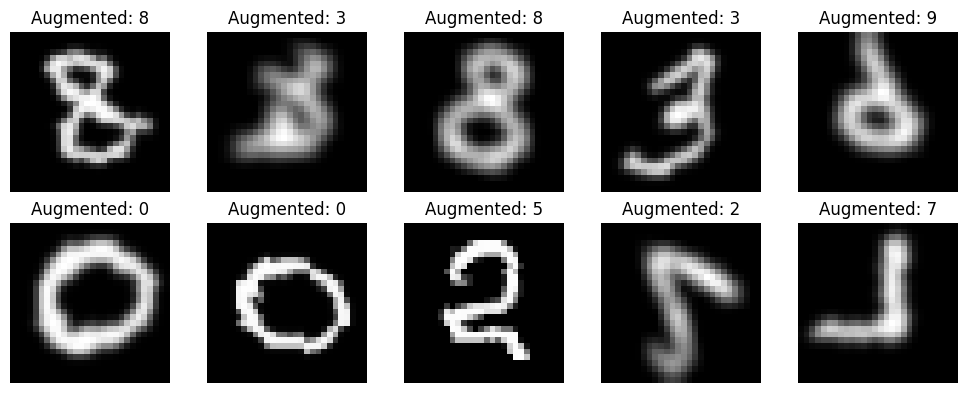

In [11]:
augmented_images, labels = next(iter(mnist_augment_loader))
visualize_data(augmented_images, labels, title='Augmented')